In [31]:
# 시계열 데이터 사례 분석

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [33]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv'
df = pd.read_csv(dataset_filepath)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [34]:
# Date를 index_col로 지정
df = pd.read_csv(dataset_filepath, index_col = 'Date', parse_dates = True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [35]:
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

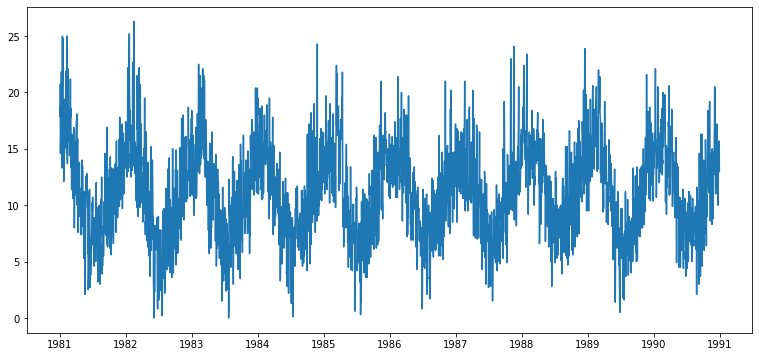

In [36]:
# 시계열 안정성의 정성적 분석
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 13,6

plt.plot(ts1)

In [37]:
# 결측치 확인
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

In [38]:
# 결측치 처리 방법
# drop
# interpolate
# 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택

Series([], Name: Temp, dtype: float64)


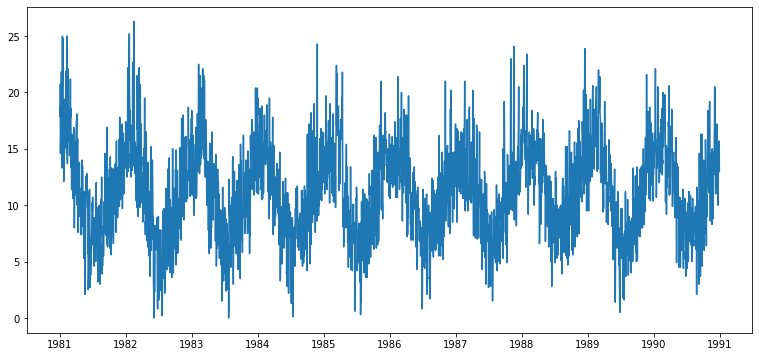

In [39]:
# 결측치를 보간, 보간 기준은 time을 선택
ts1 = ts1.interpolate(method = 'time')
print(ts1[ts1.isna()])
plt.plot(ts1)

In [40]:
# 일정기간 내 구간 통계치(Rolling Statistics)를 시각화 하는 함수
# 구간의 평균(rolling mean, 이동평균)과 구간의 표준편차(rolling std, 이동표준편차)를 시각화
def plot_rolling_statistics(timeseries, window = 12):
    
    rolmean = timeseries.rolling(window = window).mean()
    rolstd = timeseries.rolling(window = window).std()
    
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

print('슝 = 3')

슝 = 3


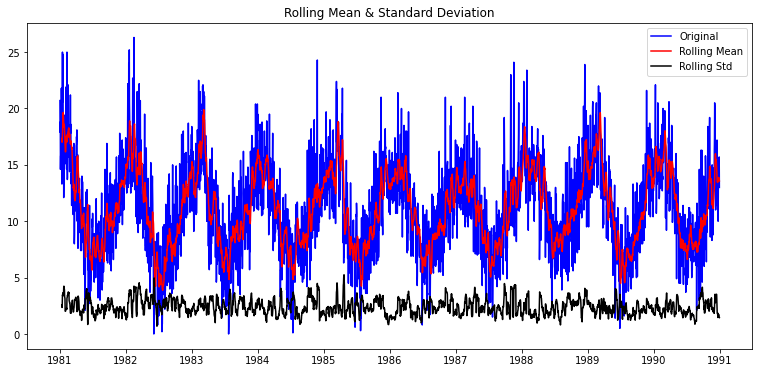

In [41]:
plot_rolling_statistics(ts1, window = 12)

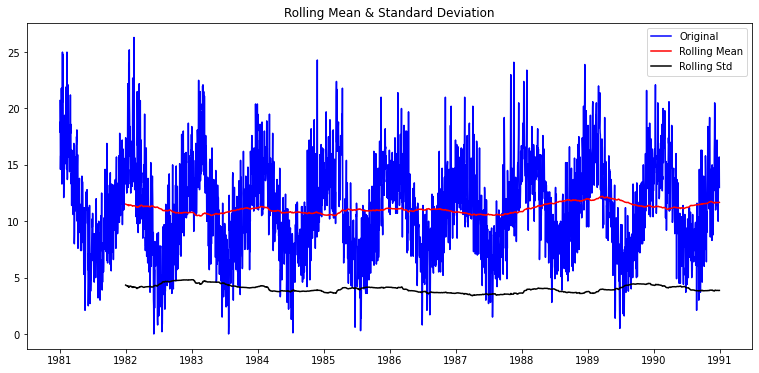

In [42]:
plot_rolling_statistics(ts1, window = 365)

In [43]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


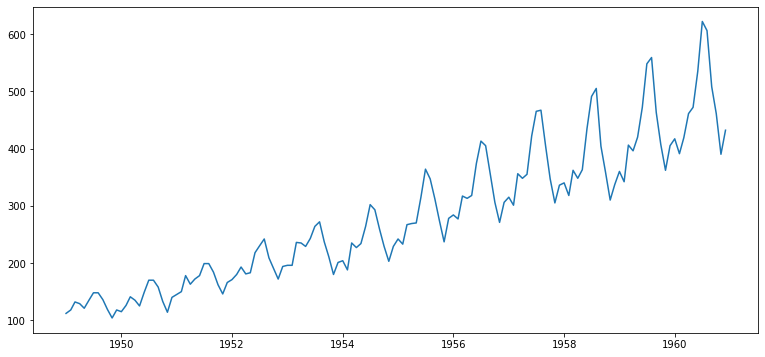

In [44]:
ts2 = df['Passengers']
plt.plot(ts2)

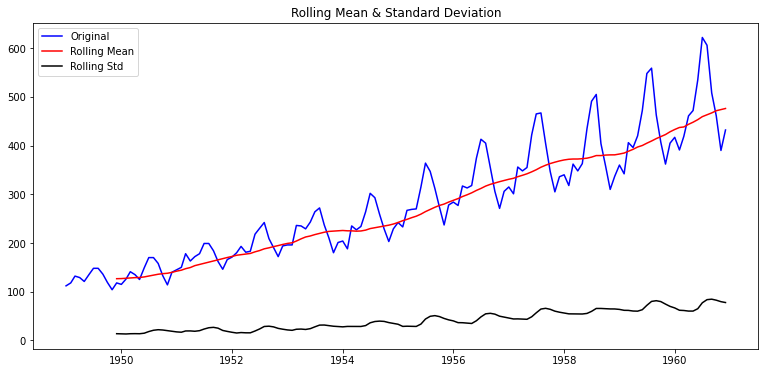

In [45]:
plot_rolling_statistics(ts2, window = 12)

In [46]:
# 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 
# 적어도 안정적이진 않다고 정성적인 결론을 내릴 수 있다.
# 이런 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법

In [47]:
# Augmented Dickey-Fuller Test(ADF Test)
# 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)

In [48]:
# statsmodels 패키지와 adfuller 메서드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag = 'AIC')
    
    # adfuller 매서드가 리턴한 결과를 정리하여 출력
    print('Results of Dikey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

print('슝 = 3')

슝 = 3


In [49]:
augmented_dickey_fuller_test(ts1)

Results of Dikey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [50]:
# pvalue 0.05 미만, 귀무가설 기각, 대립가설이 채택

In [51]:
augmented_dickey_fuller_test(ts2)

Results of Dikey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [52]:
# 귀무가설이 참

In [53]:
# 안정적이지 않은 시계열 안정적으로 바꾸기
## 보다 Statinary한 시계열로 가공

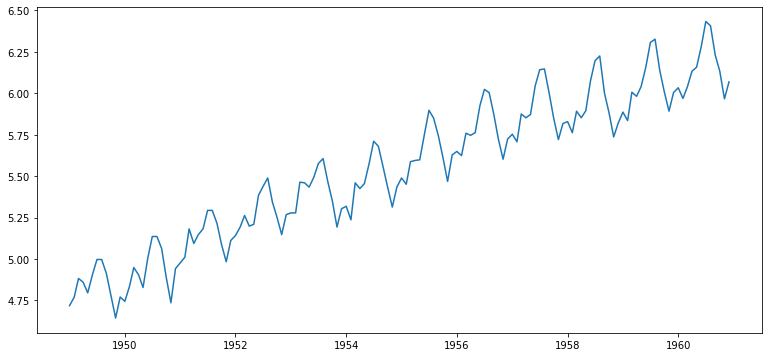

In [54]:
# 1-1 로그 함수 변환
ts_log = np.log(ts2)
plt.plot(ts_log)

In [55]:
augmented_dickey_fuller_test(ts_log)
# pvalue 감소 확인

Results of Dikey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


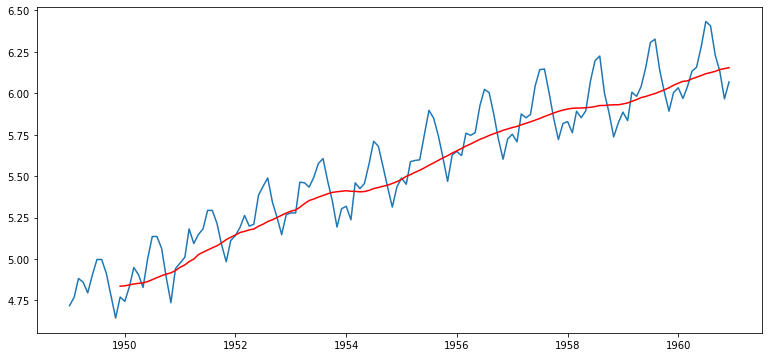

In [56]:
# 1-2 Moving average 제거 - 추세(trend) 상쇄
moving_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [57]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [58]:
# 계산시 앞의 11개 데이터에 결측치 발생
ts_log_moving_avg.dropna(inplace = True)
ts_log_moving_avg.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: Passengers, dtype: float64

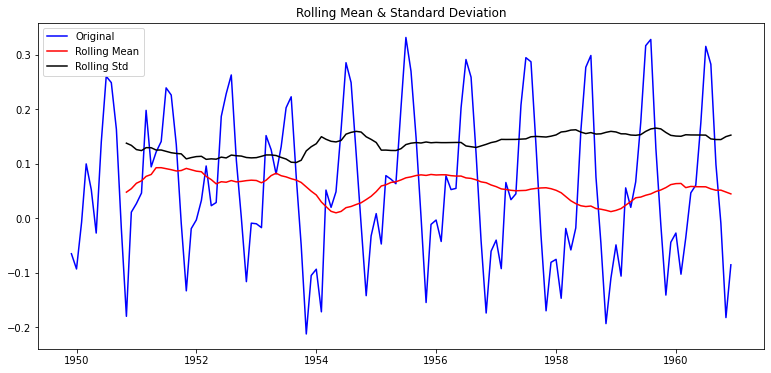

In [59]:
# tslogmovingavg를 정성, 정량적 분석
plot_rolling_statistics(ts_log_moving_avg)

In [60]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dikey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [61]:
# pvalue 유의수준으로 감소 확인
# 하지만 Moving Average를 계산하는 window = 12로 정확하게 지정해야 한다.
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


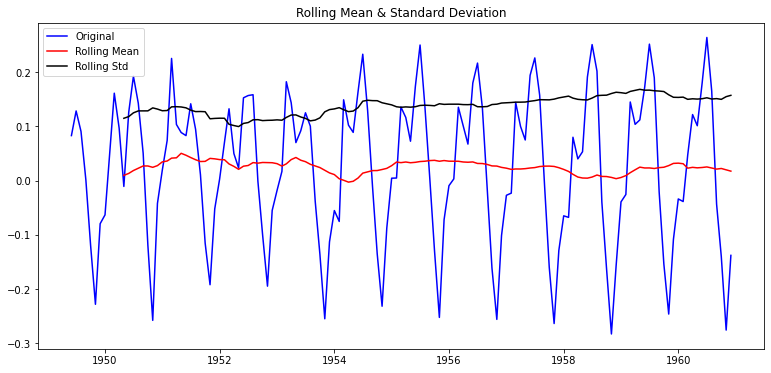

In [62]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [63]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)
# 6으로 지정 시 p-value 값이 유의하지 않다.

Results of Dikey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [ ]:
# 1-3 차분(differencing) - 계절성(Seasonality) 상쇄
# 패턴이 파악되지 않은 주기적 변화는 불안정성 요소이다.
# 추세 (Trend) 장기적으로 증가하거나, 감소하는 경향성이 존재하는 것을 의미합니다.
# 주로 시계열에서 기울기가 증가하거나 감소할 때 관찰됩니다.
# 일정 시간 발생했다가 사라지고 반복되지 않습니다.

#계절성 (Seasonality)\
#일정 기간 안에 반복적으로 나타나는 패턴을 의미합니다.
# 빈도의 형태로 나타나며 항상 일정한 경우가 많습니다.

#주기성 (Cycle)
#정해지지 않은 빈도, 기간으로 일어나는 상승 혹은 하락을 의미합니다. (주기성은 학자마다 조금씩 정의가 다르니, 참고로만 알아 두시길 바랍니다)

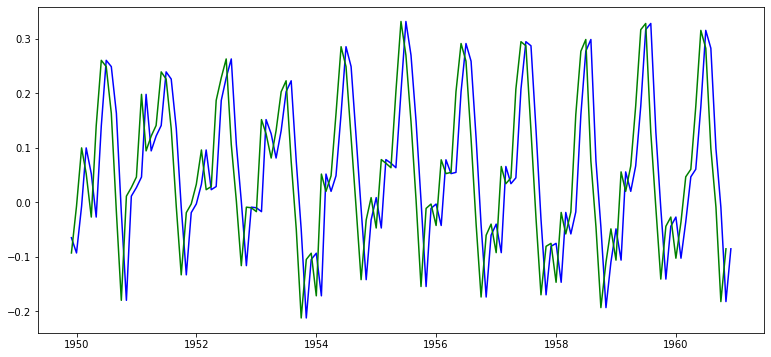

In [65]:
# 차분은 미분처럼 시계열을 한 스템 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법
# 이번 스텝에서 발생한 변화량을 의미
ts_log_moving_avg_shift = ts_log_moving_avg.shift(-1)

plt.plot(ts_log_moving_avg, color = 'blue')
plt.plot(ts_log_moving_avg_shift, color = 'green')

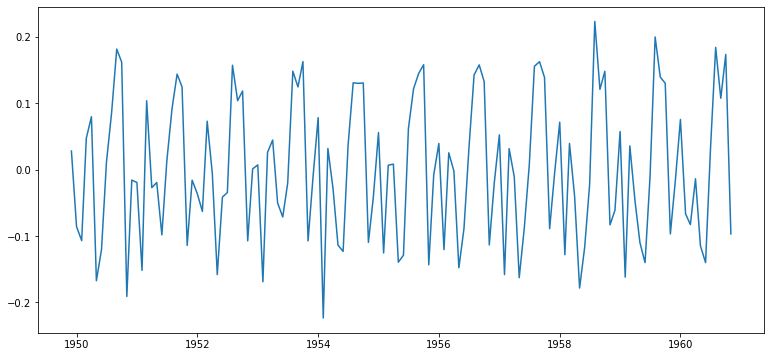

In [68]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

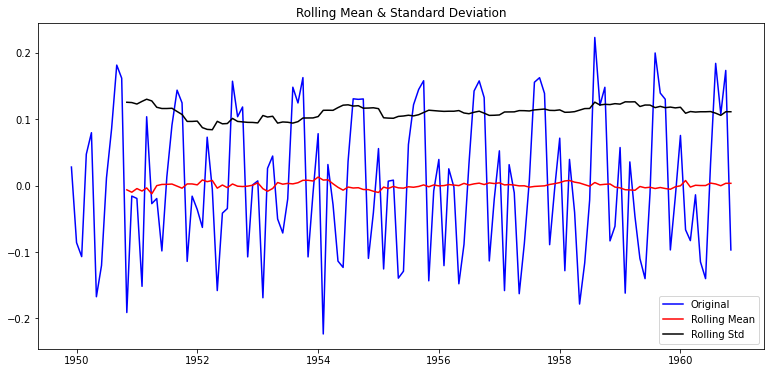

In [69]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [70]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)
# pvalue 유의

Results of Dikey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


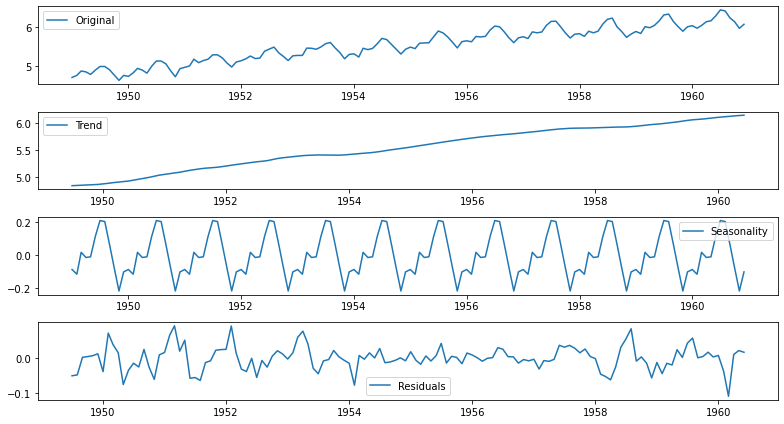

In [71]:
# 시계열 분해
# statsmodels의 seasonal_decompos 
# 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual

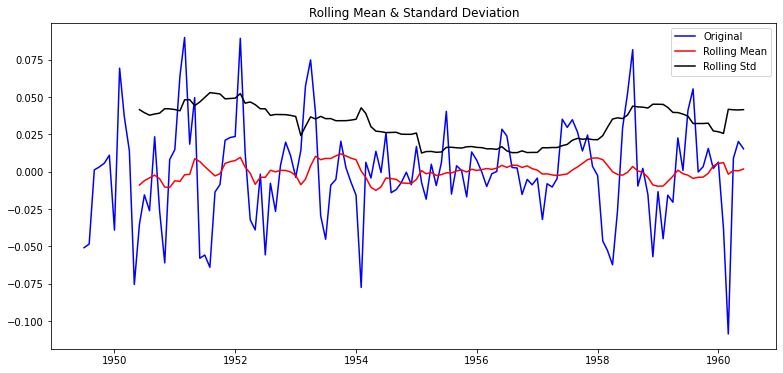

In [72]:
# residual 안정성 확인
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [73]:
residual.dropna(inplace = True)
augmented_dickey_fuller_test(residual)

Results of Dikey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
# ARIMA 모델의 정의
# ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)
# AR = 시계열의 Residual에 해당하는 부분 모델링
# MA = 시계열의 Trend에 해당하는 부분 모델링
# I = 시계열의 Seasonality에 해당하는 부분을 모델링
# ARIMA 모델의 모수 p,d,q
# p : 자기회귀 모형의 시차
# d : 차분 누적의 횟수
# q : 이동평균 모형의 시차
# ACF와 PACF를 이용해 pdq 선택
# ACF = 시차에 따른 관측치들 사이의 관련성 측정
# PACF = 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정

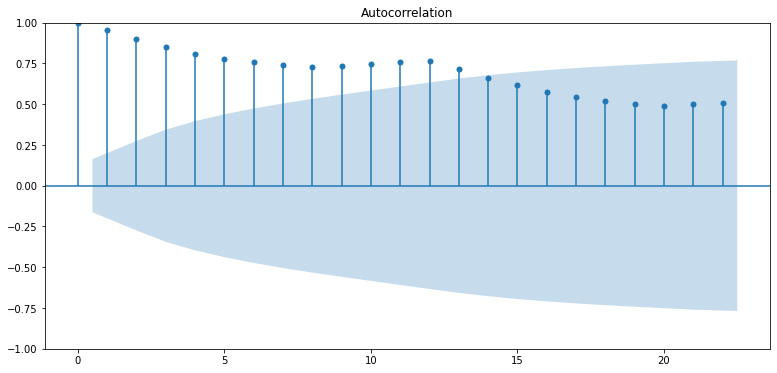

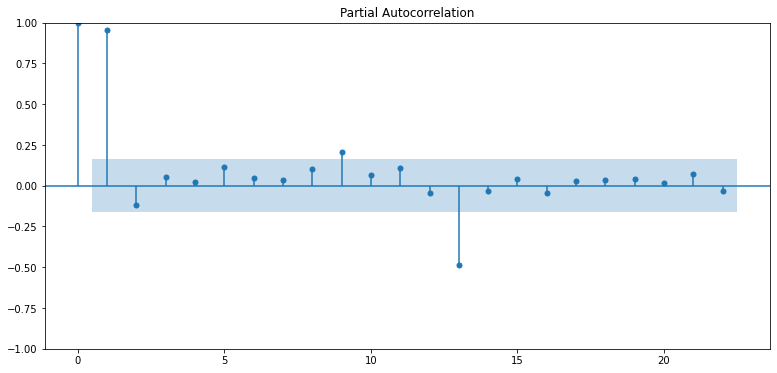

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)
plot_pacf(ts_log)
plt.show()
# ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정

Results of Dikey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


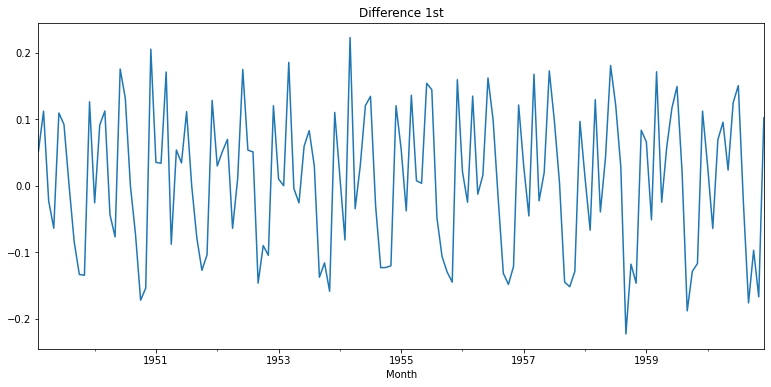

In [77]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods = 1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dikey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


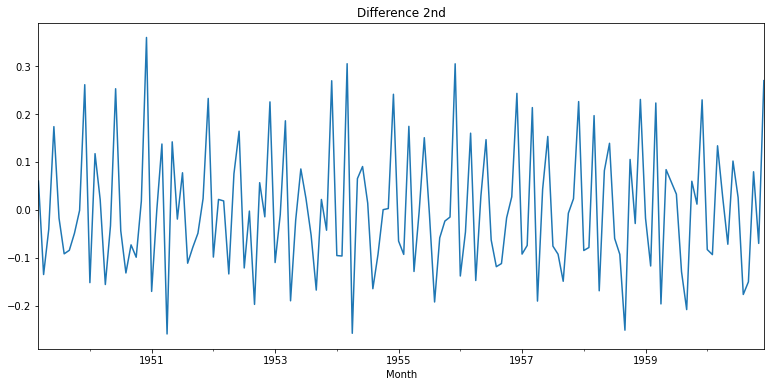

In [78]:
diff_2 = diff_1.diff(periods = 1).iloc[1:]
diff_2.plot(title = 'Difference 2nd')

augmented_dickey_fuller_test(diff_2)

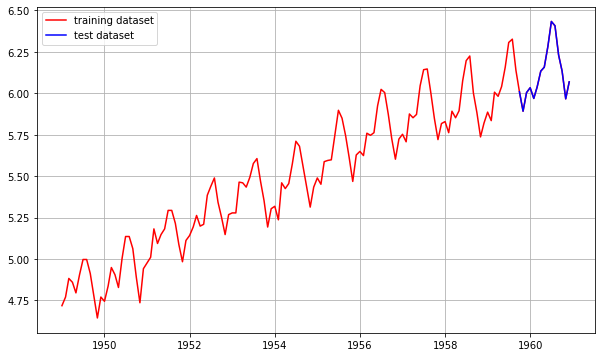

In [79]:
# 학습 데이터 분리
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize = (10,6))
plt.grid(True)
plt.plot(ts_log, c = 'r', label = 'training dataset')
plt.plot(test_data, c = 'b', label = 'test dataset')
plt.legend()

In [80]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


In [88]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.935
Date:                Tue, 27 May 2025   AIC                           -409.870
Time:                        05:44:08   BIC                           -367.089
Sample:                    01-01-1949   HQIC                          -392.488
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2710      0.082     -3.315      0.001      -0.431      -0.111
ar.L2         -0.0120      0.109     -0.110      0.912      -0.225       0.201
ar.L3          0.0018      0.046      0.040      0.9

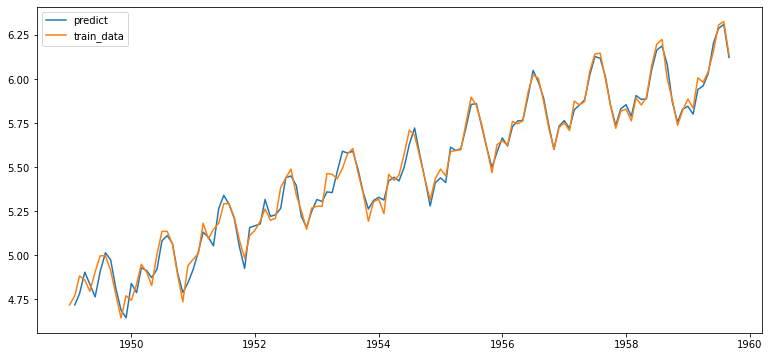

In [89]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()
# ARIMA 훈련 결과 시각적으로 확인

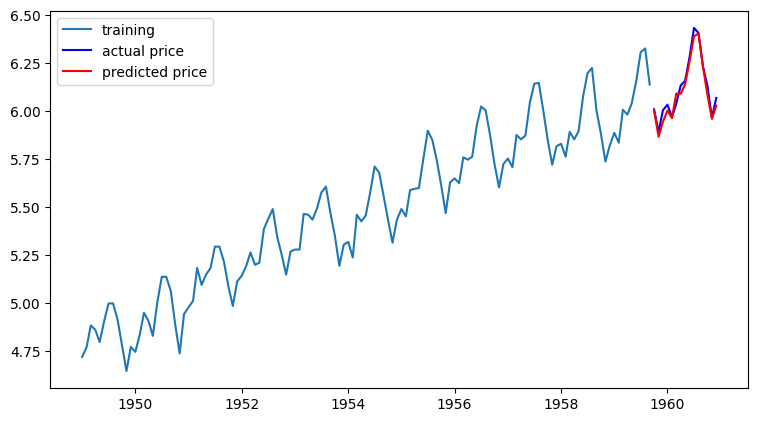

In [91]:
# forecast() 이용해 테스트 데이터 구간의 데이터 예측
model = ARIMA(train_data, order = (14,1,0))
fitted_m = model.fit()
fc = fitted_m.forecast(len(test_data), alpha = 0.05)

fc_series = pd.Series(fc, index = test_data.index)

plt.figure(figsize = (9,5), dpi = 100)
plt.plot(train_data, label = 'training')
plt.plot(test_data, c = 'b', label = 'actual price')
plt.plot(fc_series, c = 'r', label = 'predicted price')
plt.legend()
plt.show()

In [93]:
# np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mse)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  226.73423780634943
MAE:  226.73423780634943
RMSE:  15.057696962229961
MAPE: 2.69%


In [ ]:
# 최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기주으로 10% 정도의 오차율